<a href="https://colab.research.google.com/github/priyasi345/diamonds/blob/master/multi_imageclassi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [8]:
df = pd.read_csv('Catdogcar1.csv')

df

,id,label
0,0,dog
1,1,cat
2,10,dog
3,100,car
4,101,car
...,...,...
145,95,dog
146,96,car
147,97,car
148,98,car


dog    68
car    51
cat    31
Name: label, dtype: int64

 Total images:  150


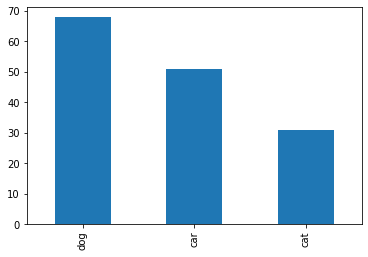

In [9]:

df['label'].value_counts().plot.bar()
print(df['label'].value_counts())

print("\n Total images: ", df.shape[0])

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(96, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax')) # 3 because we have car, dog and cat classes

model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)            

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001) 
callbacks = [earlystop, learning_rate_reduction]

dog    52
car    44
cat    24
Name: label, dtype: int64

 Total train images:  120


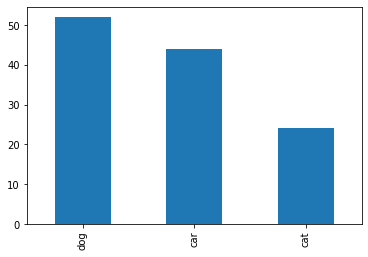

In [12]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['label'].value_counts().plot.bar()
print(train_df['label'].value_counts())
print("\n Total train images: ", train_df.shape[0])

dog    16
car     7
cat     7
Name: label, dtype: int64

 Total validate images:  30


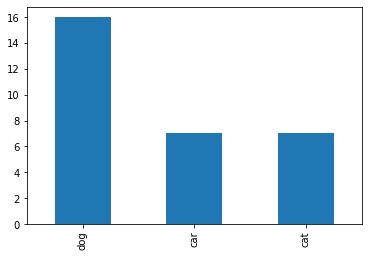

In [13]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['label'].value_counts().plot.bar()

print(validate_df['label'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [14]:
total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 120
Total validate images: 30


In [18]:
N_train=np.percentile(total_train,99)
N_test=np.percentile(total_validate,99)
N_train,N_test

(120.0, 30.0)

In [19]:
from keras.preprocessing.image import ImageDataGenerator
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,fill_mode='nearest')

In [20]:
model2 .fit_generator(aug.flow(train_df,validate_df,batch_size=10),validation_data=validate_df,steps_per_epoch=len(train_df),epochs=EPOCHS)

ValueError: ignored